# Download Dataset

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irasalsabila","key":"589a4505738e7e8a157046eb8ea792b9"}'}

In [3]:
# check dataset list
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9166  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5618  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2035  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2399  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [4]:
# download dataset
!kaggle datasets download -d madisona/translated-animals10

100% 585M/586M [00:04<00:00, 175MB/s]
100% 586M/586M [00:04<00:00, 143MB/s]


In [6]:
# unzip
!mkdir animals
!unzip -qq translated-animals10.zip -d animals
!ls animals
!ls animals/animals10/raw-img/

mkdir: cannot create directory ‘animals’: File exists
replace animals/animals10/raw-img/butterfly/OIP--04ndbWy7I04gsPgu9qOeQHaHs.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
animals10
butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


# Load Dataset

In [19]:
# libraries
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# listing animals
animals = os.path.join('/content/animals/animals10/raw-img/')
print(os.listdir(animals))

['chicken', 'squirrel', 'dog', 'horse', 'elephant', 'cat', 'butterfly', 'cow', 'sheep', 'spider']


In [10]:
# ignoring animals
ignore_animals = ['squirrel', 'cat', 'butterfly', 'sheep', 'cow', 'horse']

for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [11]:
#listing animals
list_animals = os.listdir(animals)
print(list_animals)

['chicken', 'dog', 'elephant', 'spider']


In [13]:
#print total animals
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x + ':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

chicken: 3098
- (300, 273)
- (300, 225)
- (269, 300)
- (251, 300)
---------------
dog: 4863
- (282, 300)
- (201, 300)
- (300, 300)
- (300, 225)
---------------
elephant: 1446
- (640, 359)
- (259, 194)
- (209, 300)
- (270, 194)
---------------
spider: 4821
- (300, 225)
- (300, 240)
- (300, 193)
- (300, 200)
---------------

Total : 14228


<function matplotlib.pyplot.show>

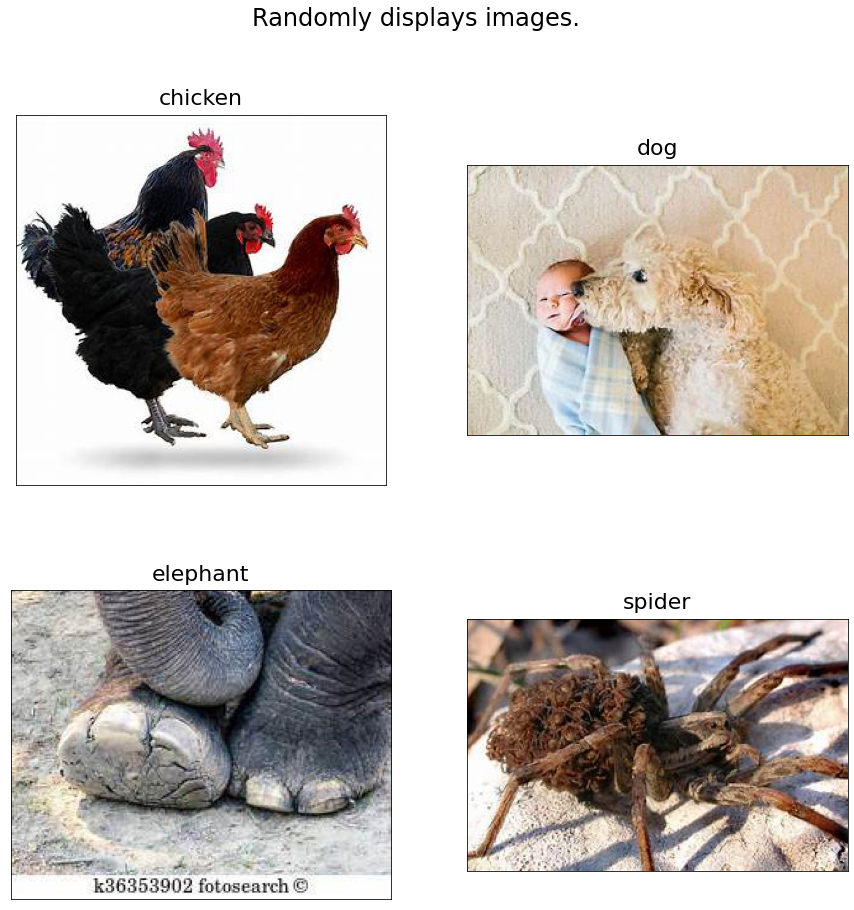

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (15,15))
fig.suptitle("Randomly displays images.", fontsize = 24)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id] 
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

# Modelling and Plotting

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2   
)

In [18]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    animals,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

data_val = train_datagen.flow_from_directory(
    animals, 
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

Found 11384 images belonging to 4 classes.
Found 2844 images belonging to 4 classes.


In [20]:
tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3 ), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [22]:
history = model.fit(data_train, 
                    epochs = 40, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/40
44/44 [==============================] - 130s 2s/step - loss: 1.2923 - accuracy: 0.3705 - val_loss: 1.2329 - val_accuracy: 0.4730
Epoch 2/40
44/44 [==============================] - 94s 2s/step - loss: 1.1436 - accuracy: 0.5027 - val_loss: 1.0501 - val_accuracy: 0.5682
Epoch 3/40
44/44 [==============================] - 94s 2s/step - loss: 1.0382 - accuracy: 0.5731 - val_loss: 0.9977 - val_accuracy: 0.5788
Epoch 4/40
44/44 [==============================] - 94s 2s/step - loss: 0.9451 - accuracy: 0.6167 - val_loss: 0.8792 - val_accuracy: 0.6488
Epoch 5/40
44/44 [==============================] - 94s 2s/step - loss: 0.8691 - accuracy: 0.6555 - val_loss: 0.7710 - val_accuracy: 0.6829
Epoch 6/40
44/44 [==============================] - 94s 2s/step - loss: 0.7767 - accuracy: 0.6972 - val_loss: 0.7177 - val_accuracy: 0.7198
Epoch 7/40
44/44 [==============================] - 95s 2s/step - loss: 0.7224 - accuracy: 0.7204 - val_loss: 0.6191 - val_accuracy: 0.7631
Epoch 8/40
44/44 [=

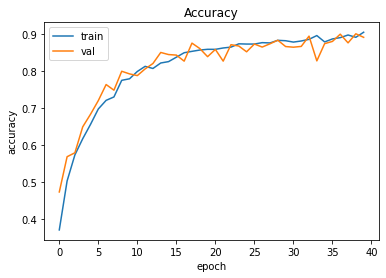

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

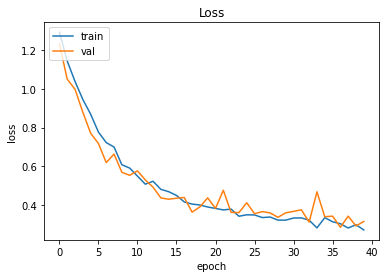

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv0z7tuzr/assets


In [26]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900684 Jul 14 07:20 model.tflite
